In [1]:
# 我们要尝试人工构造一下波形
# 包含从数值相对论中读取+注入噪声
# 但话说回来，我考虑不注入噪声，这应当是可行的，尽管需要查看data和inject是不是可以共同使用。。。。
# 没看出什么来，我们来大胆尝试一下吧，反正第一步构建NR波形总是要做的

# 我们换个notebook因为要换环境

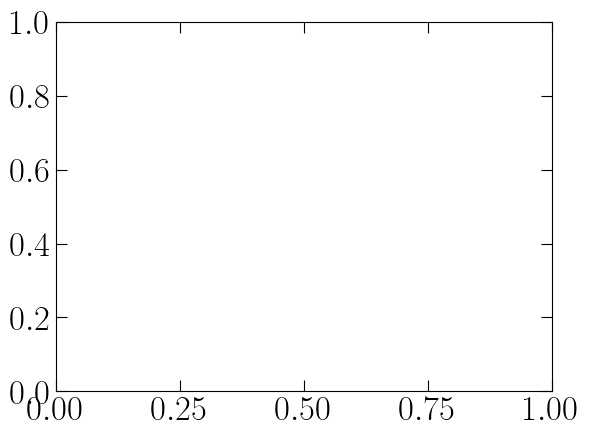

In [1]:
# 我们又换回来因为我们有些要用prRing里的函数进行处理
import math
import scipy.special
import numpy as np
from kuibit import simdir as sd
import pyRing
from astropy import constants as const
# 我们把所有单位都归化到cm好了
c=const.c.cgs.value
G=const.G.cgs.value
M_sun=const.M_sun.cgs.value
Mpc=const.pc.cgs.value*10**6

import matplotlib.pyplot as plt

plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 8
plt.rcParams["ytick.major.size"] = 8
plt.rcParams["xtick.minor.size"] = 4
plt.rcParams["ytick.minor.size"] = 4
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True
plt.rcParams["axes.labelpad"] = 8
plt.rcParams["figure.constrained_layout.h_pad"] = 0
plt.rcParams["text.usetex"] = True
plt.rcParams["font.sans-serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
plt.tick_params(axis="both", which="minor", labelsize=18)

# 要用到 -2Ylm
# 但其中 phi我们会固定为0，所以这个是没有 e^im\phi 这个部分的实函数
def spin_Ylm(s,l,m,theta):
    if(l<np.abs(2)):
        return 0
    fac1=(-1)**(l+m-s)*(math.factorial(l+m)*math.factorial(l-m)*(2*l+1)/4/np.pi/math.factorial(l+s)/math.factorial(l-s))**(1/2)*np.sin(theta/2)**(2*l)
    fac2=0
    for r in range(l-s+1):
        fac2+=(-1)**r*scipy.special.comb(l-s,r)*scipy.special.comb(l+s,r+s-m)/np.tan(theta/2)**(2*r+s-m)

    return fac1*fac2

# 顺带定义两个patten function
def Fp(theta,phi,psi):
    return 1/2*(1+np.cos(theta)**2)*np.cos(2*psi)*np.cos(2*phi)-np.cos(theta)*np.sin(2*psi)*np.sin(2*phi)

def Fc(theta,phi,psi):
    return 1/2*(1+np.cos(theta)**2)*np.sin(2*psi)*np.cos(2*phi)+np.cos(theta)*np.cos(2*psi)*np.sin(2*phi)


In [2]:
name="30"


with sd.SimDir("/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name,pickle_file="/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/"+name+".pickle") as sim:
    print(sim)

psi4=sim.multipoles["psi4"][110.69]
print(psi4.available_lm)

Indexed 28365 files and 15 subdirectories
Folder /home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/30
/home/yuntian/vscode_codes/QNM_compare/Kerr_Newman/30
Available scalar timeseries:
['qlm_time[0]', 'qlm_time[1]', 'qlm_time[2]', 'qlm_equatorial_circumference[0]', 'qlm_equatorial_circumference[1]', 'qlm_equatorial_circumference[2]', 'qlm_polar_circumference_0[0]', 'qlm_polar_circumference_0[1]', 'qlm_polar_circumference_0[2]', 'qlm_polar_circumference_pi_2[0]', 'qlm_polar_circumference_pi_2[1]', 'qlm_polar_circumference_pi_2[2]', 'qlm_area[0]', 'qlm_area[1]', 'qlm_area[2]', 'qlm_irreducible_mass[0]', 'qlm_irreducible_mass[1]', 'qlm_irreducible_mass[2]', 'qlm_radius[0]', 'qlm_radius[1]', 'qlm_radius[2]', 'qlm_spin_guess[0]', 'qlm_spin_guess[1]', 'qlm_spin_guess[2]', 'qlm_mass_guess[0]', 'qlm_mass_guess[1]', 'qlm_mass_guess[2]', 'qlm_killing_eigenvalue_re[0]', 'qlm_killing_eigenvalue_re[1]', 'qlm_killing_eigenvalue_re[2]', 'qlm_killing_eigenvalue_im[0]', 'qlm_killing_eigenvalue_im[1]',

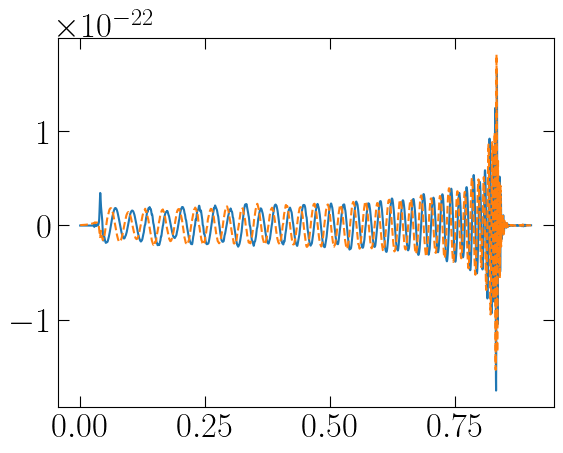

In [3]:
# 有一些参数。。。
ra=1.1579
dec=-1.1911
triggertime=1126259462.4232266
psi=1.45
iota=2.64
M=31.6+38.9
dL=410

data=np.genfromtxt("NR_data_"+name+"/strain_0_00_cutoff_low_0.005.dat")
t=data[:,0]*G*M*M_sun/c**3
hp=np.zeros(len(t))
hc=np.zeros(len(t))

# for lm in psi4.available_lm:
for lm in [[3,-3]]:
    l=lm[0]
    m=lm[1]

    data=np.genfromtxt(f"NR_data_"+name+f"/strain_0_{l}{m}_cutoff_low_0.005.dat")
    hp_lm=data[:,1]
    hc_lm=data[:,2]
    # 放大330模式
    if(l==3 and (m==3 or m==-3)):
        hp_lm*=1.65/0.673
        hc_lm*=1.65/0.673

    Y_2lm=spin_Ylm(-2,l,m,iota)

    for i in range(len(t)):
        hp[i]+=hp_lm[i]*Y_2lm*G*M*M_sun/c**2/dL/Mpc*110.69
        hc[i]+=hc_lm[i]*Y_2lm*G*M*M_sun/c**2/dL/Mpc*110.69

plt.plot(t,hp)
plt.plot(t,hc,'--')
    

In [6]:
print(spin_Ylm(-2,3,3,2.64))
print(spin_Ylm(-2,3,-3,2.64))

-0.0016672851700003117
0.3870427007454038


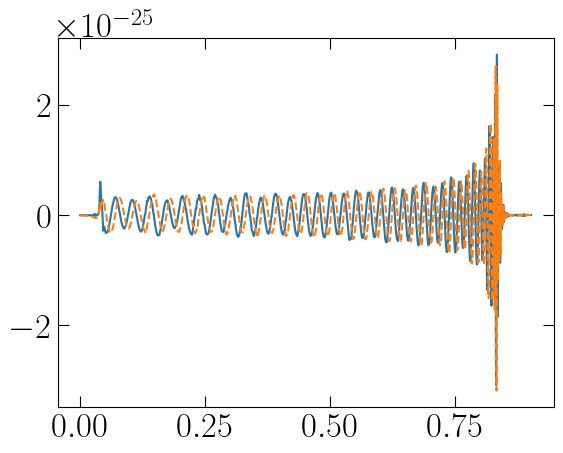

In [4]:
hp=np.zeros(len(t))
hc=np.zeros(len(t))
for lm in [[3,3]]:
    l=lm[0]
    m=lm[1]

    data=np.genfromtxt(f"NR_data_"+name+f"/strain_0_{l}{m}_cutoff_low_0.005.dat")
    hp_lm=data[:,1]
    hc_lm=data[:,2]

    Y_2lm=spin_Ylm(-2,l,m,iota)

    for i in range(len(t)):
        hp[i]+=hp_lm[i]*Y_2lm*G*M*M_sun/c**2/dL/Mpc*110.69
        hc[i]+=hc_lm[i]*Y_2lm*G*M*M_sun/c**2/dL/Mpc*110.69

plt.plot(t,hp)
plt.plot(t,hc,'--')

# hp=np.zeros(len(t))
# hc=np.zeros(len(t))
# for lm in psi4.available_lm:
#     l=lm[0]
#     m=lm[1]

#     data=np.genfromtxt(f"NR_data_"+name+f"/strain_0_{l}{m}_cutoff_low_0.005.dat")
#     hp_lm=data[:,1]
#     hc_lm=data[:,2]

#     Y_2lm=spin_Ylm(-2,l,m,iota)

#     for i in range(len(t)):
#         hp[i]+=hp_lm[i]*Y_2lm*G*M*M_sun/c**2/dL/Mpc*110.69
#         hc[i]+=hc_lm[i]*Y_2lm*G*M*M_sun/c**2/dL/Mpc*110.69

# plt.plot(t,hp)
# plt.plot(t,hc,'--')

In [4]:
import pyRing.utils
import lal

hs=np.zeros(len(t))
hvx=np.zeros(len(t))
hvy=np.zeros(len(t))

ref_det    = lal.cached_detector_by_prefix["H1"]
tM_gps     = lal.LIGOTimeGPS(float(triggertime))


# 然后要有这个什么detector
detector=lal.cached_detector_by_prefix["H1"]
time_delay_H1 = lal.ArrivalTimeDiff(detector.location, ref_det.location, ra, dec, tM_gps)
h_H1=pyRing.utils.project_python_wrapper(hs,hvx,hvy,hp,hc,detector,ra,dec,psi,tM_gps+time_delay_H1)
t_peak_H1=t[np.argmax(np.abs(h_H1))]

detector=lal.cached_detector_by_prefix["L1"]
time_delay_L1 = lal.ArrivalTimeDiff(detector.location, ref_det.location, ra, dec, tM_gps)
h_L1=pyRing.utils.project_python_wrapper(hs,hvx,hvy,hp,hc,detector,ra,dec,psi,tM_gps+time_delay_L1)
t_peak_L1=t[np.argmax(np.abs(h_L1))]

/home/yuntian/anaconda3/envs/pyRing/lib/python3.9/site-packages/pyRing/utils.py:12: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/home/yuntian/anaconda3/envs/pyRing/lib/python3.9/site-packages/pyRing/utils.py:65: UserWarning: * The `surfinBH` package is not automatically installed due to possible conflicts. If you wish to use its functionalities, it needs to be installed separately.
  warnings.warn("* The `surfinBH` package is not automatically installed due to

(0.5, 0.7)

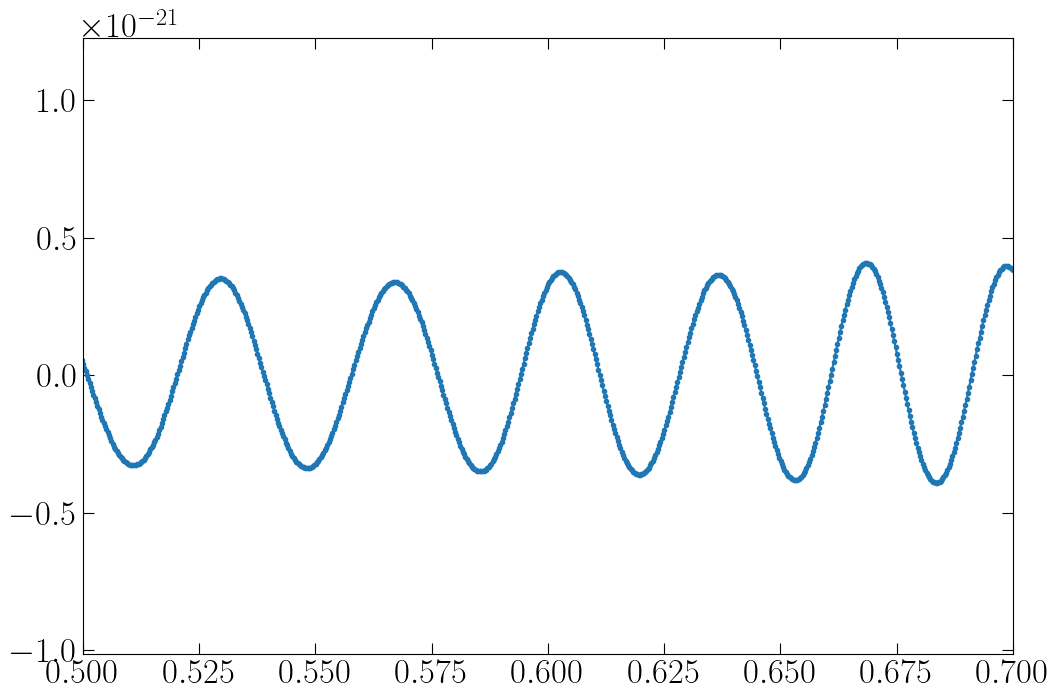

In [5]:
plt.figure(figsize=(12,8))
plt.plot(t,h_H1,'.-')
# plt.plot(t,h_L1)
plt.xlim([0.5,0.7])

In [6]:
# 然后我们仿照真实数据把他们重采样到4KHz并且存下来
# starting from GPS 1126259447 duration 32
# 4096 / per second
from scipy.interpolate import CubicSpline
f_H1=CubicSpline(t-t_peak_H1,h_H1)
f_L1=CubicSpline(t-t_peak_H1,h_L1)

h_H1_list=np.zeros(32*4096)
h_L1_list=np.zeros(32*4096)

for i in range(32*4096):
    # 此刻的时间-trigger_time-delay_time
    ti_H1=1126259447+1/4096*i-triggertime-time_delay_H1
    ti_L1=1126259447+1/4096*i-triggertime-time_delay_L1
    if(ti_H1<-t_peak_H1 or ti_H1>t[-1]-t_peak_H1):
        h_H1_list[i]=0
    else:
        h_H1_list[i]=f_H1(ti_H1)

    if(ti_L1<-t_peak_H1 or ti_L1>t[-1]-t_peak_H1):
        h_L1_list[i]=0
    else:
        h_L1_list[i]=f_L1(ti_L1)
    

In [7]:
fo=open(f"NR_data_"+name+"_330amp/H-H1_GWOSC_4KHZ_R1-1126259447-32.txt","w")

for i in range(len(h_H1_list)):
    fo.write(f"{h_H1_list[i]:+.16e}\n")
fo.close()

# fo=open(f"NR_data_"+name+"_2-2_3-3/L-L1_GWOSC_4KHZ_R1-1126259447-32.txt","w")

# for i in range(len(h_L1_list)):
#     fo.write(f"{h_L1_list[i]:+.16e}\n")
# fo.close()

In [46]:
# import json

# # 假设你有一个叫 data.json 的文件
# with open("ET.json", "r", encoding="utf-8") as f:
#     data = json.load(f)

In [47]:
# with open("ET.json", "r", encoding="utf-8") as f:
#     data = json.load(f)
# plt.figure(figsize=(12,8))
# plt.plot(data["frequency"],data["strain"])

# data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/pyring/pyRing/data/PSDs/ASD_LIGO-P1200087-v18-aLIGO_DESIGN.txt")
# plt.plot(data[:,0],data[:,1])

# data=np.genfromtxt("/home/yuntian/vscode_codes/pyRing/pyring/pyRing/data/PSDs/ASD_LIGO-P1200087-v18-AdV_DESIGN.txt")
# plt.plot(data[:,0],data[:,1])

# plt.yscale("log")
# plt.xscale("log")
# plt.legend(["ET","aLIGO","AdV"])

In [48]:
# with open("ET.json", "r", encoding="utf-8") as f:
#     data = json.load(f)

# fo=open("ASD_ET.txt","w")
# for i in range(len(data["frequency"])):
#     f=data["frequency"][i]
#     s=data["strain"][i]
#     fo.write(f"{f:+.16e} {s:+.16e}\n")
# fo.close()